## 1. Simple Octave/MATLAB function

**Import third-party libraries and modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

from computeCost import computeCost
from warmupExercise import warmupExercise
from plotData import plotData
from gradientDescent import gradientDescent

Return 5x5 identity matrix.

`A = eye(5)`

In [2]:
## ==================================== Part 1: Basic Function =====================================
# Complete warmupExercise()
print('Running warmupExericse ... \n')
print('5x5 Identity Matrix: \n')
warmupExercise()

Running warmupExericse ... 

5x5 Identity Matrix: 



array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2. Linear regression with one variable
In this part of this exercise, we will implement linear regression with one variable predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.You would like to use this data to help you select which city to expand to next.

The file **ex1data1.txt** contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

The `ex1.py` script has already been set up to load this data for us.

### 2.1 Plotting the Data
For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

In `ex1.py`, the dataset is loaded from the data file into the variables X and y.

Plotting Data ...

[[ 6.1101  17.592  ]
 [ 5.5277   9.1302 ]
 [ 8.5186  13.662  ]
 [ 7.0032  11.854  ]
 [ 5.8598   6.8233 ]
 [ 8.3829  11.886  ]
 [ 7.4764   4.3483 ]
 [ 8.5781  12.     ]
 [ 6.4862   6.5987 ]
 [ 5.0546   3.8166 ]
 [ 5.7107   3.2522 ]
 [14.164   15.505  ]
 [ 5.734    3.1551 ]
 [ 8.4084   7.2258 ]
 [ 5.6407   0.71618]
 [ 5.3794   3.5129 ]
 [ 6.3654   5.3048 ]
 [ 5.1301   0.56077]
 [ 6.4296   3.6518 ]
 [ 7.0708   5.3893 ]
 [ 6.1891   3.1386 ]
 [20.27    21.767  ]
 [ 5.4901   4.263  ]
 [ 6.3261   5.1875 ]
 [ 5.5649   3.0825 ]
 [18.945   22.638  ]
 [12.828   13.501  ]
 [10.957    7.0467 ]
 [13.176   14.692  ]
 [22.203   24.147  ]
 [ 5.2524  -1.22   ]
 [ 6.5894   5.9966 ]
 [ 9.2482  12.134  ]
 [ 5.8918   1.8495 ]
 [ 8.2111   6.5426 ]
 [ 7.9334   4.5623 ]
 [ 8.0959   4.1164 ]
 [ 5.6063   3.3928 ]
 [12.836   10.117  ]
 [ 6.3534   5.4974 ]
 [ 5.4069   0.55657]
 [ 6.8825   3.9115 ]
 [11.708    5.3854 ]
 [ 5.7737   2.4406 ]
 [ 7.8247   6.7318 ]
 [ 7.0931   1.0463 ]
 [ 5.0702   5.1

Text(0.5, 1.0, 'Dataset')

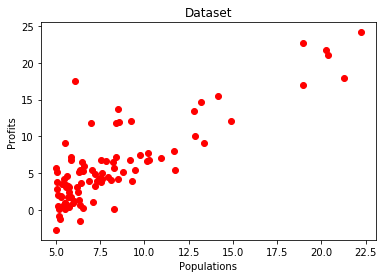

In [3]:
## ==================================== Part 2: Plotting ============================================
print('Plotting Data ...\n')
data = np.loadtxt('ex1data1.txt', delimiter=',')
print(data)

X = data[:, 0] # populations
y = data[:, 1] # profits

m = len(y) # number of training examples

# Plot data
# Note: you have to complete the code in plotData()
plotData(X, y)
plt.title('Dataset')

Reshape X and y in proper dimension

In [4]:
## =========================== Part 3: Cost and Gradient descent ============================
# convert X, y to numpy array
X = np.reshape(X, (m, 1))
y = np.reshape(y, (m, 1))

### 2.2 Gradient Descent
In this part, we will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations
The objective of linear regression is to minimize the cost function

$$
\begin{equation} J\big(\theta\big) = \frac{1}{2m}\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)})-y^{(i)}\big)^{2} \end{equation}
$$

where the hypothesis $h_{\theta}\big(x\big)$ is given by the linear model

$$
h_{\theta}\big(x\big) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}
$$

Recall that the parameters of your model are the $\theta_{j}$ values. These are the values you will adjust to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update.

$$
\theta_{j}:=\theta_{j} - \alpha \frac{1}{m}\sum_{i=1}^{m}\big(h_{\theta}(x^{(i)}-y^{(i)}\big)x_{j}^{(i)}
$$

With each step of gradient descent, your parameters $\theta_{j}$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$

#### 2.2.2 Implementaion
In `ex1.py`, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the $\theta_{0}$ intercept term. We also initialize the inital parameters to 0 and the learning rate $\alpha$ to 0.01

In [5]:
X_intercept = np.concatenate((np.ones((m, 1)), X), axis=1) # Add intercept
theta = np.zeros((2, 1)) # Init theta

# Some gradient descent settings
iterations = 1500
alpha = 0.01

Once we have completed the function, the next step in `ex1.py` will run *computeCost* once using $\theta$ initialzed to zeros, and you will see the cost printed to screen.

You should expect to see a cost of 32.07

In [11]:
print('Testing the cost function ...\n')

# Compute and display init cost
J = computeCost(X_intercept, y, theta)
print('with theta = [0, 0]\nCost computed = %f\n' % (J))
print('Expected cost value (approx) 32.07\n')

# further testing of the cost function
J = computeCost(X_intercept, y, np.array([[-1], [2]]))
print('with theta = [-1, 2]\nCost computed = %f\n' % (J))
print('Expected cost value (approx) 52.24')

Testing the cost function ...

with theta = [0, 0]
Cost computed = 4.483388

Expected cost value (approx) 32.07

with theta = [-1, 2]
Cost computed = 54.242455

Expected cost value (approx) 52.24


___
#### 2.2.4 Gradient descent
Next, you will implement gradient descent in the file **gradientDescent.py**.

Make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterd by the vector $\theta$, not X and y. That is, we minimzize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing X or y.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The code for **gradientDescent.py** calls *computeCost* on every iteration and prints the cost. Your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [12]:
print('Running gradient descent ...\n')
# run gradient descent
theta, J_history = gradientDescent(X_intercept, y, theta, alpha, iterations)
# print theta to the screen
print('Theta found by gradient descent:\n')
print(theta); print('\n')
print('Expected theta values (approx)\n')
print('-3.6303\n1.664')

Running gradient descent ...

Theta found by gradient descent:

[[-3.87805118]
 [ 1.1912525 ]]


Expected theta values (approx)

-3.6303
1.664



After finished, `ex1.py` will use our final parameters to plot linear fit. The result should look something like figure below

Text(0, 0.5, 'Profits')

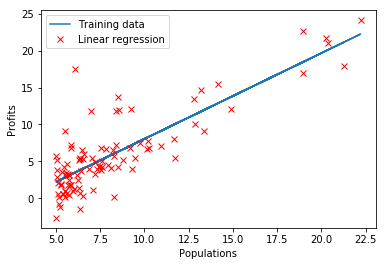

In [8]:
# plot to the linear fit
plt.plot(X[:], X_intercept.dot(theta), '-')
plt.plot(X[:], y, 'rx')
plt.legend(['Training data', 'Linear regression'])
plt.xlabel('Populations')
plt.ylabel('Profits')

Our final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people. Note the way that the following lines in `ex1.py` use matrix multiplication, rather than explicit summation or looping, to calculate the predictions.

In [9]:
# predict values for populations size of 35000 and 70000
predict1 = theta.T.dot(np.array([[1], [3.5]]))
print('for popluation = 35000, we predict a profit of of %f\n' % (predict1 * 10000))
predict2 = theta.T.dot(np.array([[1], [7]]))
print('for popluation = 70000, we predict a profit of of %f\n' % (predict2 * 10000))

for popluation = 35000, we predict a profit of of 4519.767868

for popluation = 70000, we predict a profit of of 45342.450129



### 2.4 Visualizing $J(\theta)$
To understand the cost function $J(\theta)$ better, we will plot the cost over a 2-dimensional grid of $\theta_{0}$ and $\theta_{1}$ values.

In the next step of `ex1.py`, there is code set up to calculate $J(\theta)$ over a grid of values using the *computeCost* function.

After these lines are excuted, we will have a 2-D array of $J(\theta)$ values.
The script `ex1.py` will then use these values to produce surface and contour plots of $J(\theta)$. The plots should look something like figure below.

The purpose of these graphs is to show us that how $J(\theta)$ varies with changes in $\theta_{0}$ and $\theta_{1}$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. this minimum is the optimal point for $\theta_{0}$ and $\theta_{1}$, and each step of gradient descent moves closer to this point.

Visualizing J(theta_0, theta_1) ...



Text(0, 0.5, '$\\theta_{1}$')

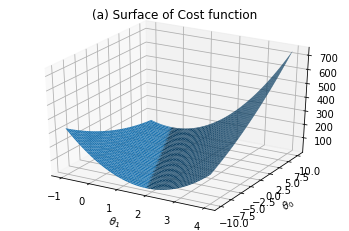

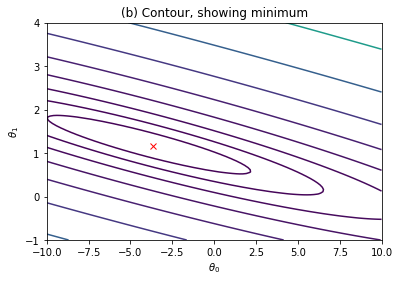

In [10]:
## ============================== Part 4: Visualizing J(theta_0, theta_1) ===========================
print('Visualizing J(theta_0, theta_1) ...\n')

# Grid over which we will calculate J
theta0_values = np.linspace(-10, 10, 100)
theta1_values = np.linspace(-1, 4, 100)

# init J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_values), len(theta1_values)))

#######xx, yy = np.meshgrid(theta0_values, theta1_values)
for i in range(len(theta0_values)):
    for j in range(len(theta1_values)):
        t = np.array([[theta0_values[i]], [theta1_values[j]]])
        J_vals[i][j] = computeCost(X_intercept, y, t)

theta0_values, theta1_values = np.meshgrid(theta0_values, theta1_values)

fig_surf = plt.figure()
ax_surf = fig_surf.gca(projection='3d')

J_vals = J_vals.T
ax_surf.plot_surface(theta1_values, theta0_values, J_vals)

plt.title('(a) Surface of Cost function')
plt.xlabel(r'$\theta_{1}$')
plt.ylabel(r'$\theta_{0}$')

fig_cont,ax_cont = plt.subplots()
ax_cont.contour(theta0_values, theta1_values, J_vals, np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'rx')
plt.title('(b) Contour, showing minimum')
plt.xlabel(r'$\theta_{0}$')
plt.ylabel(r'$\theta_{1}$')